In [9]:
!pip install --upgrade xee

In [10]:
!pip install -U geemap

In [11]:
import ee

In [12]:
ee.Authenticate()
ee.Initialize(project = "ee-grmntfrancis0",
              opt_url='https://earthengine-highvolume.googleapis.com')

In [13]:
import geemap

In [14]:
map = geemap.Map()
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [16]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Point",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      30.684905,
                      6.925821
                    ]
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [17]:
ssd = (ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
 .filterBounds(roi)
 .geometry()
 )
map.addLayer(ssd, {}, "ssd")

In [18]:
pr = (
    ee.ImageCollection("ECMWF/ERA5/MONTHLY")
    .filterDate('2018','2020')
    .select('total_precipitation')
    .map(lambda x: x.clip(ssd).copyProperties(x, x.propertyNames()))
)

In [19]:
import xarray as xr

In [21]:
ds = xr.open_dataset(
    pr,
    engine = "ee",
    crs = "EPSG:4326",
    scale = 0.27,
    geometry = ssd
)

In [22]:
ds = ds.sortby('time') * 1000.0

In [23]:
ds = ds.sortby("time") * 1000.0

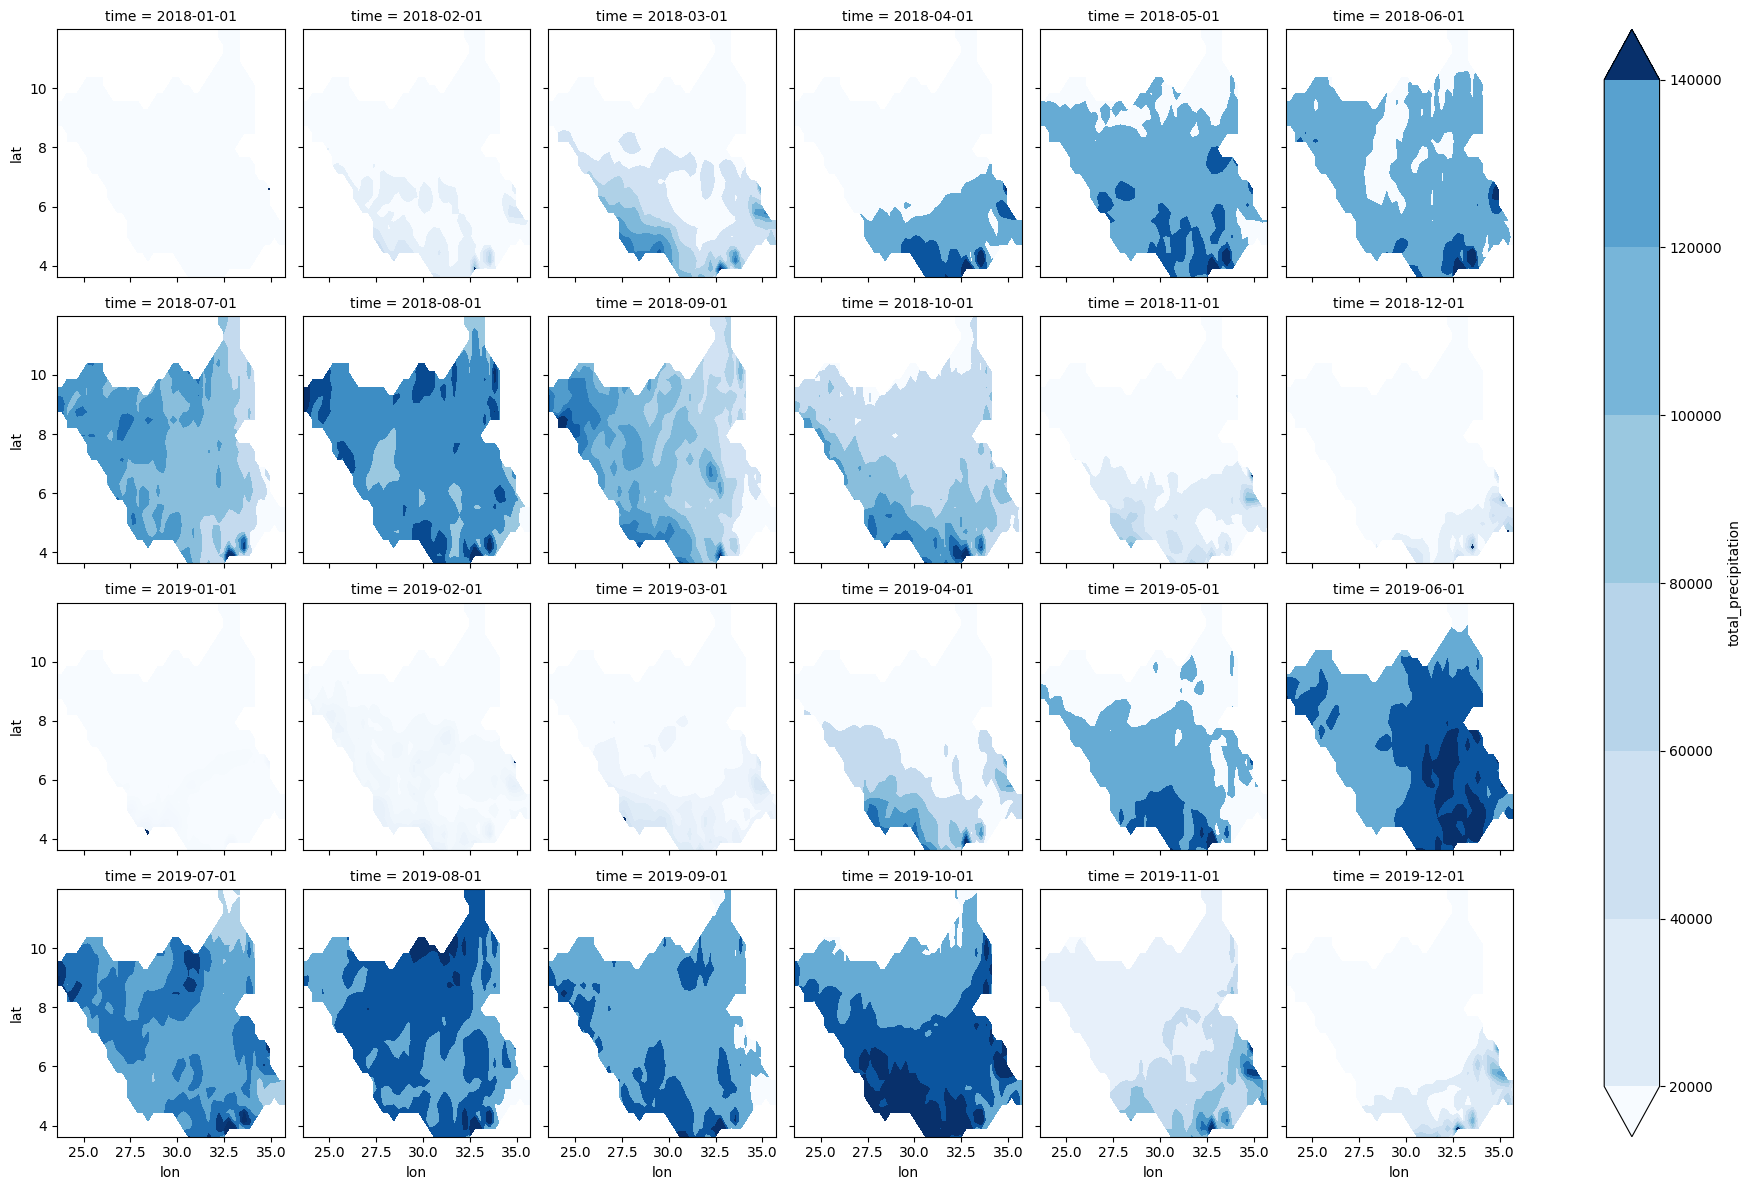

In [28]:
plot = ds.total_precipitation.plot.contourf(
    x = 'lon',
    y = 'lat',
    col = 'time',
    col_wrap = 6,
    robust = True,
    cmap = 'Blues'
)